#### Using the data given 'An Alternative Propulsion Plant for Naval Auxiliary Ships' by Edward Lawrence Stone. (post-graduate thesis) 

First read in the reliability data

In [1]:

import pandas as pd
import openpyxl

data= pd.read_excel("AuxilaryPropulsionPlant_Reliability_Availability_Data.xlsx")
# rel_data = pd.DataFrame({'Component': ['Diesel Engine', 'Clutch', 'Reduction Gear', 'Shaft and Bearings', 'CRP Propellors', 'Fuel Oil Motor', 'Fuel Oil Pump' ],
#                         'MTBF(HRS)': [8000, 50000, 200000, 200000, 25000, 7500, 5500],
#                         'MTTR(HRS)': [8, 'NR', 'NR', 'NR', 15, 18, 4.5]})
print(data)

                Component    MTBF MTTR      R      A
0           Diesel Engine    8000    8  0.999  0.999
1                  Clutch   50000   NR  0.986  1.000
2          Reduction Gear  200000   NR  0.996  1.000
3      Shaft and Bearings  200000   NR  0.996  1.000
4          CRP Propellers   25000   15  0.999  0.999
5          Fuel Oil Motor    7500   18  0.998  0.997
6           Fuel Oil Pump    5500  4.5  0.999  0.999
7       Fuel Oil Purifier   10000    4  1.000  0.999
8          Lube Oil Motor    7500  7.8  0.999  0.998
9           Lube Oil Pump    4000    5  0.999  0.998
10      Jacket Water Pump   27000  7.6  0.999  0.999
11       Fresh Water Pump   12500   12  0.999  0.999
12  Fuel Oil Booster Pump    5500  4.5  0.999  0.999


Next, store the failure and repair rates for each piece of equipment in additional columns

In [2]:
# adding failure rates to column 3
failure_rates = [1/MTBF for MTBF in data.MTBF]
data.insert(2, 'Failure Rates', failure_rates)

# add failure rates to column 5 considerign repairable and non-repairable components (MTTR = 'NR') 
repair_rates = [None] * len(data.MTTR)
for i, MTTR in enumerate(data.MTTR): 
    if type(MTTR) is str:
        repair_rates[i] = 'NR'
    else: 
        repair_rates[i] = 1/MTTR
data.insert(4, 'Repair Rates', repair_rates)

print(data)

                Component    MTBF  Failure Rates MTTR Repair Rates      R  \
0           Diesel Engine    8000       0.000125    8        0.125  0.999   
1                  Clutch   50000       0.000020   NR           NR  0.986   
2          Reduction Gear  200000       0.000005   NR           NR  0.996   
3      Shaft and Bearings  200000       0.000005   NR           NR  0.996   
4          CRP Propellers   25000       0.000040   15     0.066667  0.999   
5          Fuel Oil Motor    7500       0.000133   18     0.055556  0.998   
6           Fuel Oil Pump    5500       0.000182  4.5     0.222222  0.999   
7       Fuel Oil Purifier   10000       0.000100    4         0.25  1.000   
8          Lube Oil Motor    7500       0.000133  7.8     0.128205  0.999   
9           Lube Oil Pump    4000       0.000250    5          0.2  0.999   
10      Jacket Water Pump   27000       0.000037  7.6     0.131579  0.999   
11       Fresh Water Pump   12500       0.000080   12     0.083333  0.999   

Next, setup a Markov Chain Transition Matrix for each component using their failure and repair rates

- Chain consists of two states (0: failed and 1: working) 
- transition matrix = [1-mu, mu; lambda, 1-lambda] where mu = repair rate and lambda= failure rate

In [3]:
import numpy as np

# create a dictionary to store each transition matrix
transition_matrices = {}

# loop through each component
indexed_data= data.set_index('Component')
for comp in data.Component:

    # grab the failure and repair rates
    fail_rate = indexed_data.loc[comp, 'Failure Rates']
    repair_rate = indexed_data.loc[comp, 'Repair Rates']
    if type(repair_rate) is str: repair_rate = 0    # i.e failure is an absorbing state

    # set the transition matrix up and store
    transition_matrix = np.array([[1-repair_rate, repair_rate], [fail_rate, 1-fail_rate]])
    transition_matrices[comp] = transition_matrix

# show that each component has its own transition matrix
print(transition_matrices)

{'Diesel Engine': array([[8.75000e-01, 1.25000e-01],
       [1.25000e-04, 9.99875e-01]]), 'Clutch': array([[1.0000e+00, 0.0000e+00],
       [2.0000e-05, 9.9998e-01]]), 'Reduction Gear': array([[1.00000e+00, 0.00000e+00],
       [5.00000e-06, 9.99995e-01]]), 'Shaft and Bearings': array([[1.00000e+00, 0.00000e+00],
       [5.00000e-06, 9.99995e-01]]), 'CRP Propellers': array([[9.33333333e-01, 6.66666667e-02],
       [4.00000000e-05, 9.99960000e-01]]), 'Fuel Oil Motor': array([[9.44444444e-01, 5.55555556e-02],
       [1.33333333e-04, 9.99866667e-01]]), 'Fuel Oil Pump': array([[7.77777778e-01, 2.22222222e-01],
       [1.81818182e-04, 9.99818182e-01]]), 'Fuel Oil Purifier': array([[7.500e-01, 2.500e-01],
       [1.000e-04, 9.999e-01]]), 'Lube Oil Motor': array([[8.71794872e-01, 1.28205128e-01],
       [1.33333333e-04, 9.99866667e-01]]), 'Lube Oil Pump': array([[8.0000e-01, 2.0000e-01],
       [2.5000e-04, 9.9975e-01]]), 'Jacket Water Pump': array([[8.68421053e-01, 1.31578947e-01],
       [3

Simulate Each of the Chains

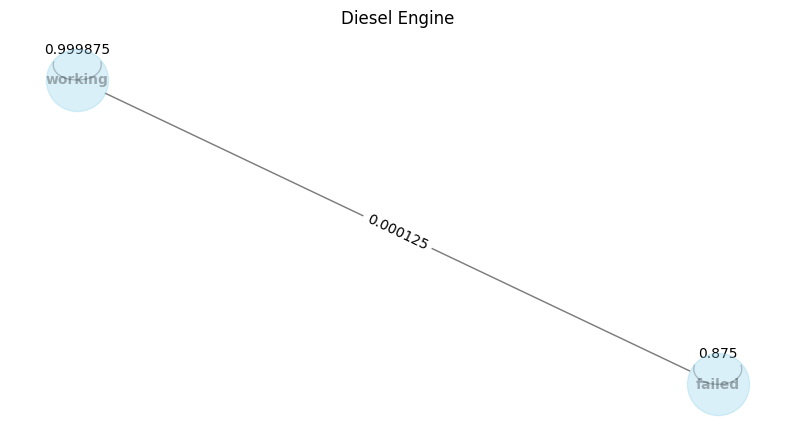

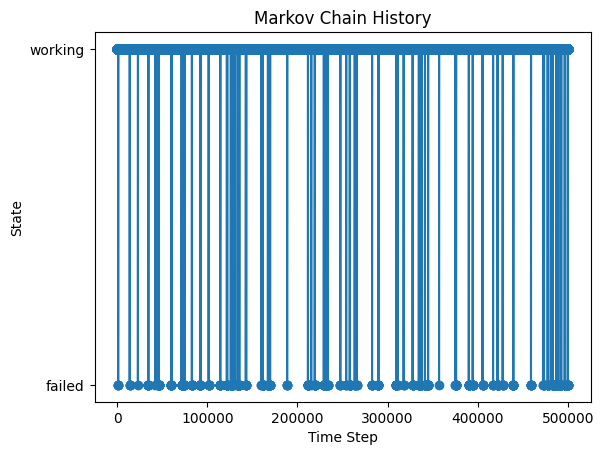

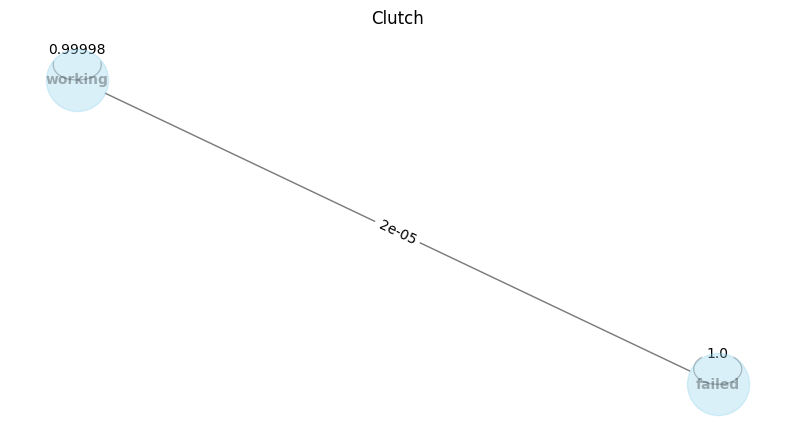

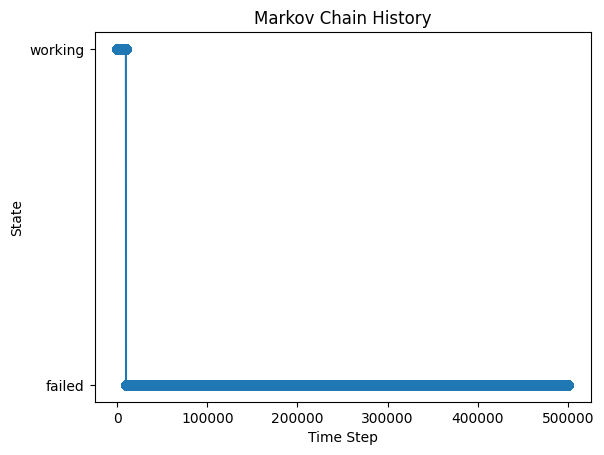

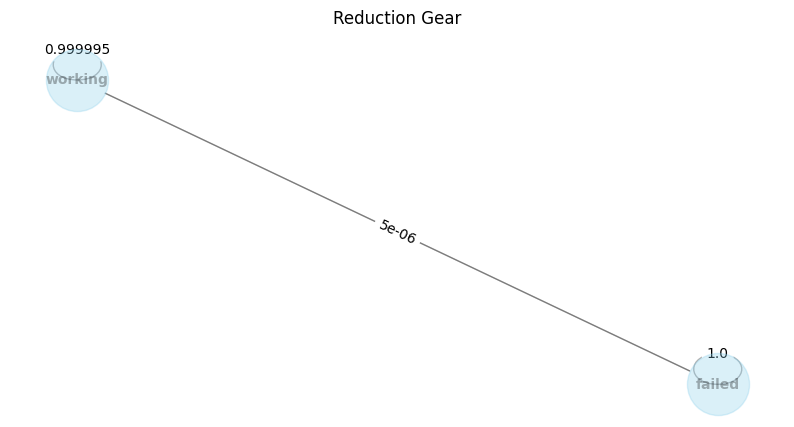

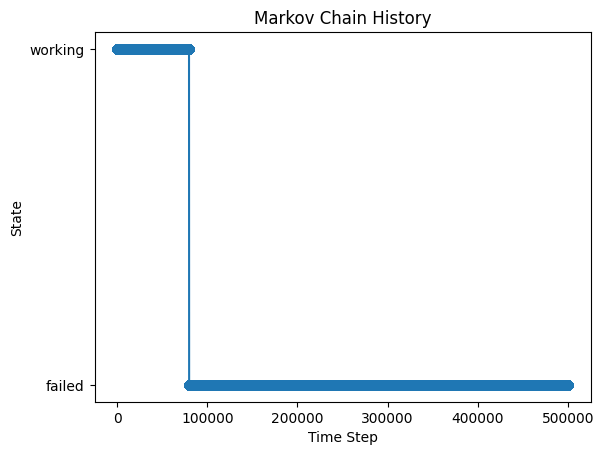

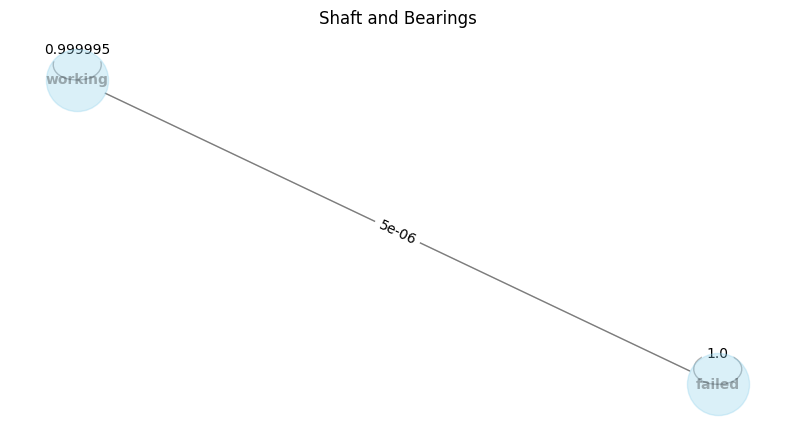

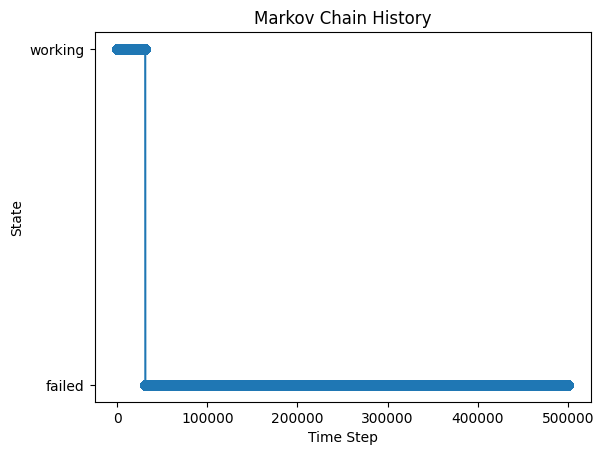

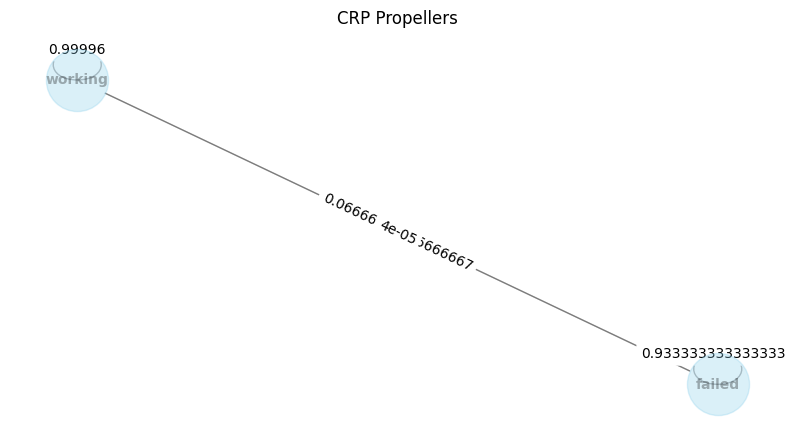

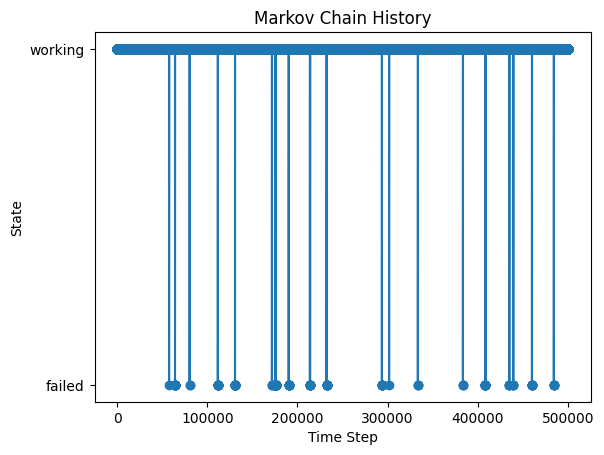

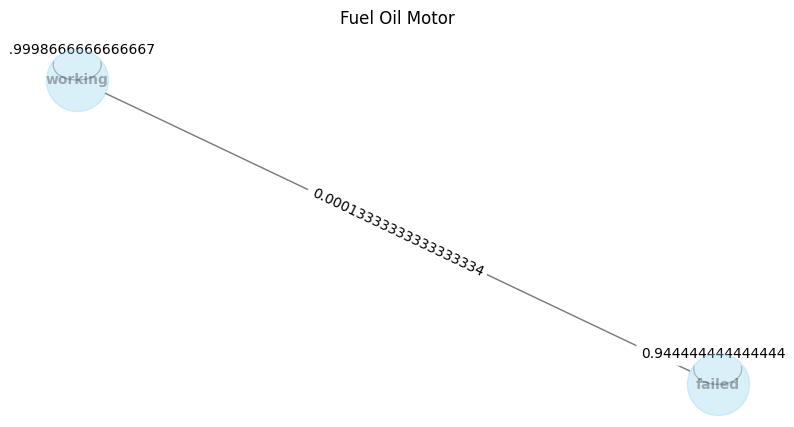

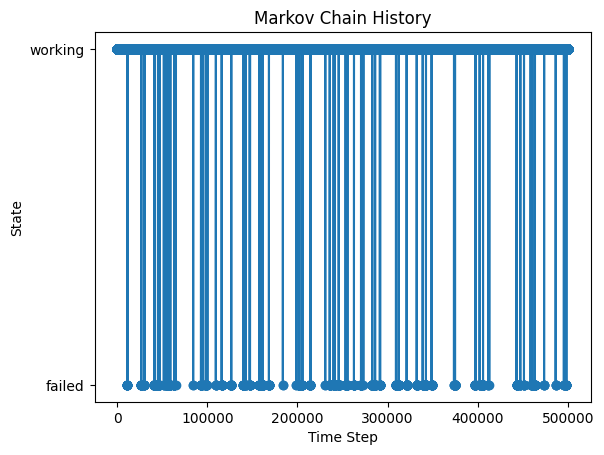

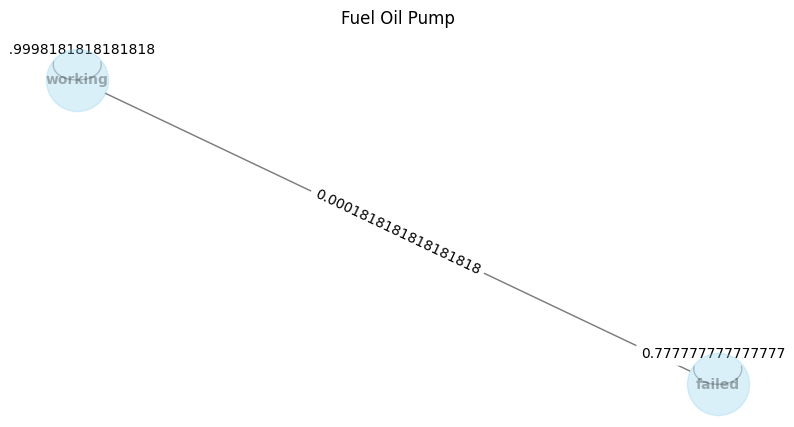

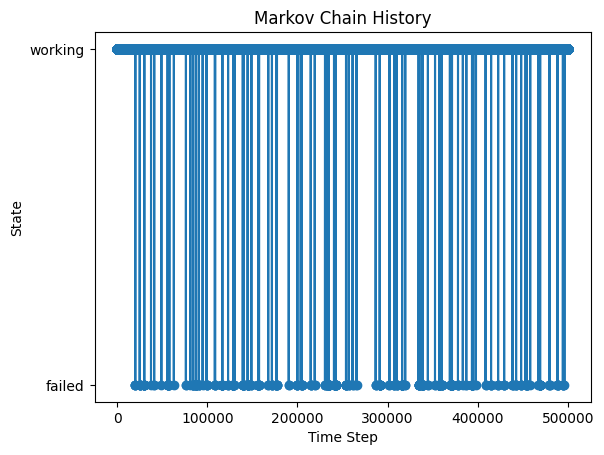

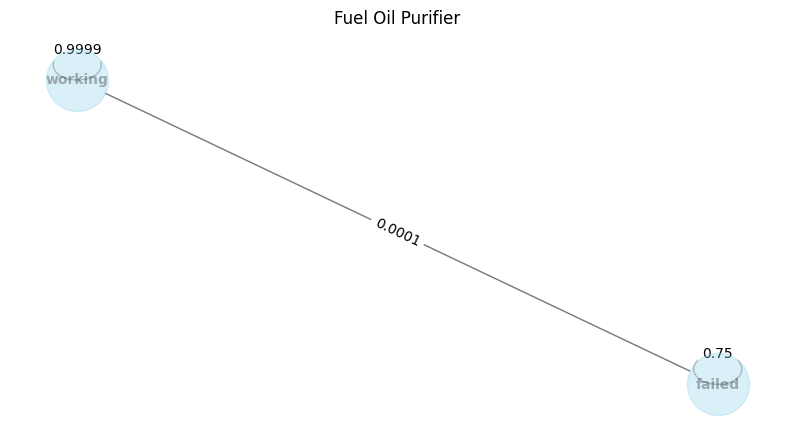

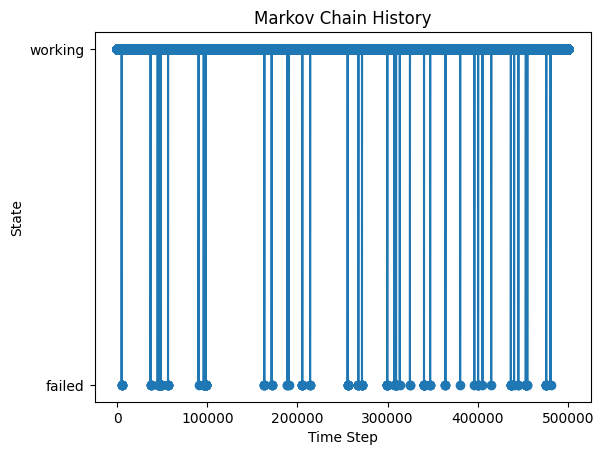

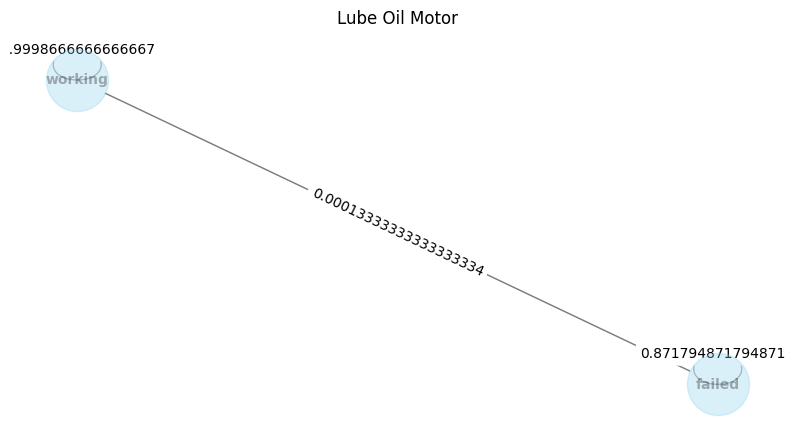

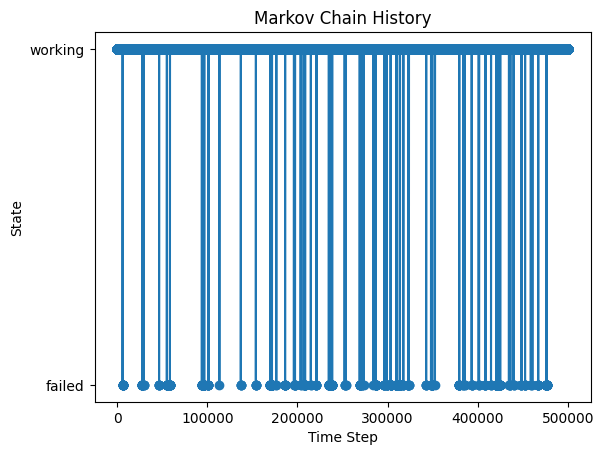

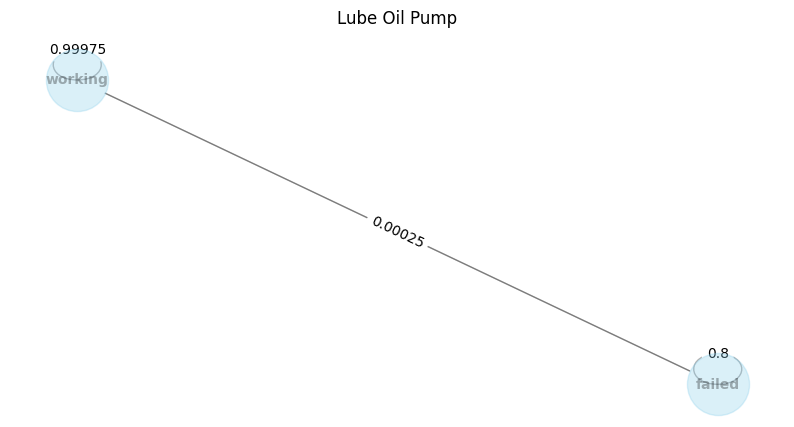

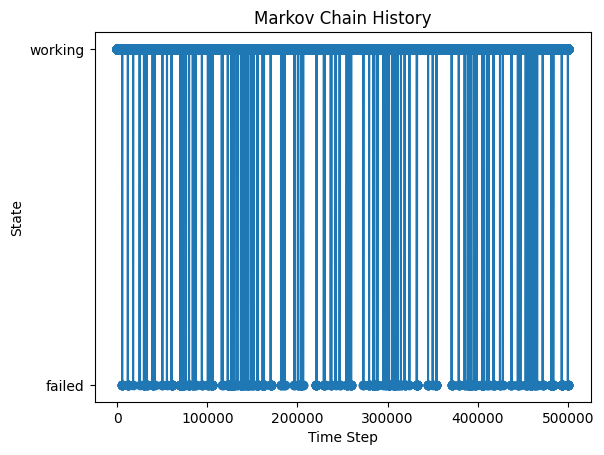

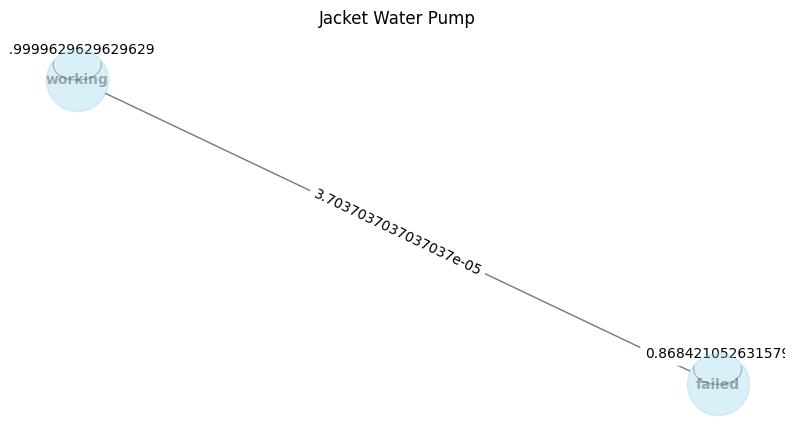

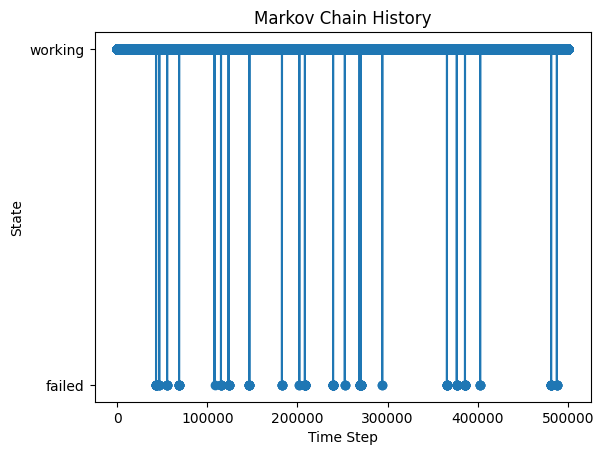

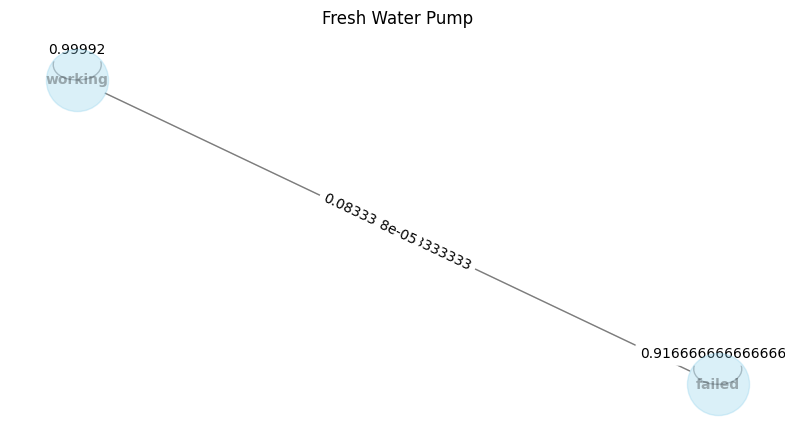

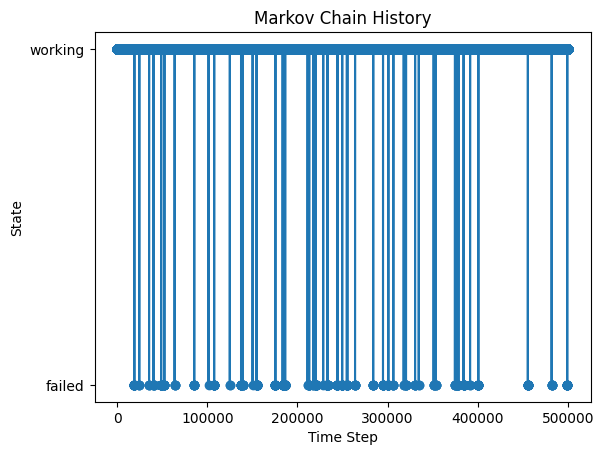

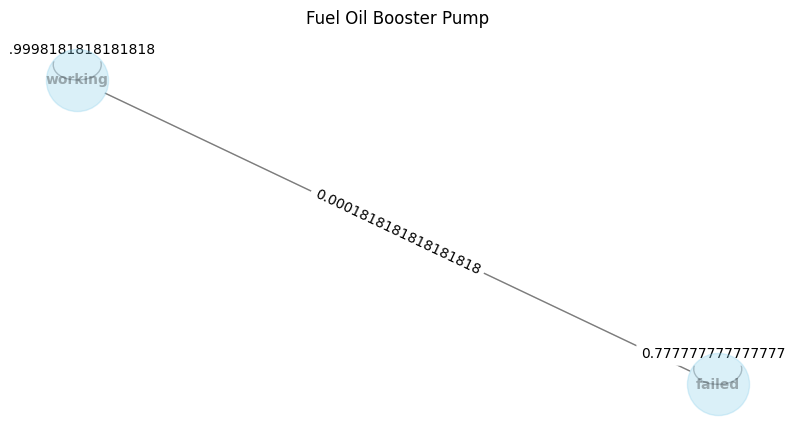

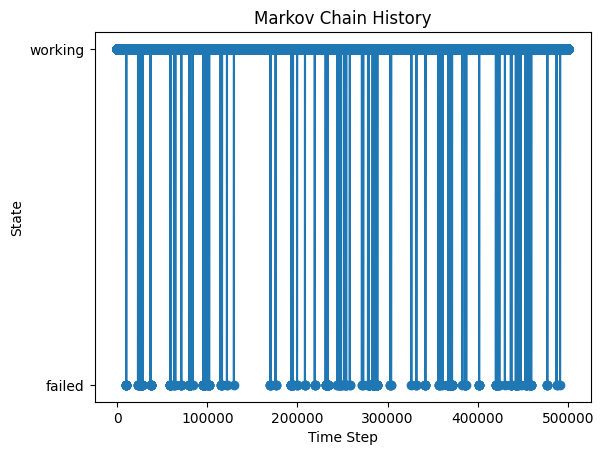

In [4]:
import sys
sys.path.append('..')
from shipClass.MarkovChain import MarkovChain

#fix states for each component 
states = {0: 'failed', 
          1: 'working'}

# simulate the comp markov chain and draw the history as a plot
for comp in data.Component:
    comp_MC = MarkovChain(states, transition_matrices[comp])
    comp_MC.drawChain(comp)
    comp_MC.simulate(500000)
    comp_MC.plotHistory()


Calculating Important Metric from the Simulations